In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/cities_r2.csv")
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [3]:
df.isnull().sum()

,0
name_of_city,0
state_code,0
state_name,0
dist_code,0
population_total,0
population_male,0
population_female,0
0-6_population_total,0
0-6_population_male,0
0-6_population_female,0


In [4]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=df[['effective_literacy_rate_total']]
x_scale=scale.fit_transform(x)


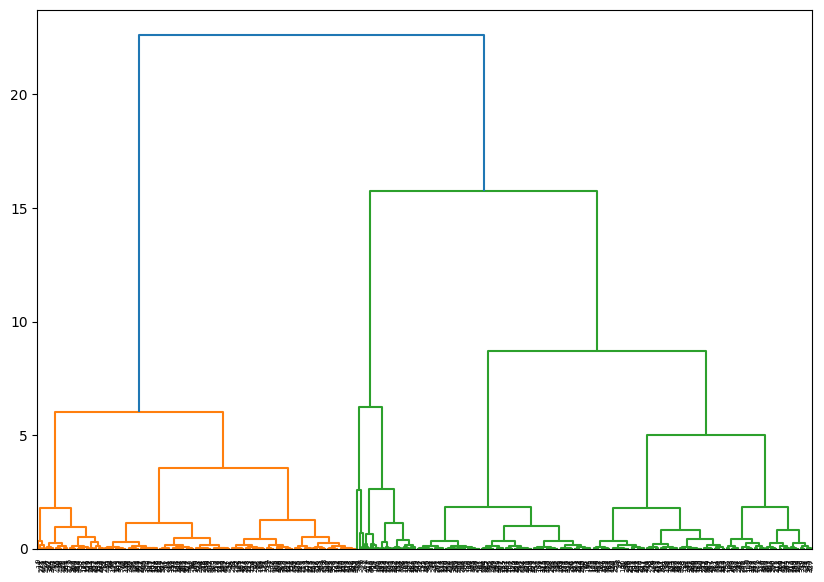

In [28]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
z=linkage(x_scale,method='ward')
dendrogram(z)
plt.show()


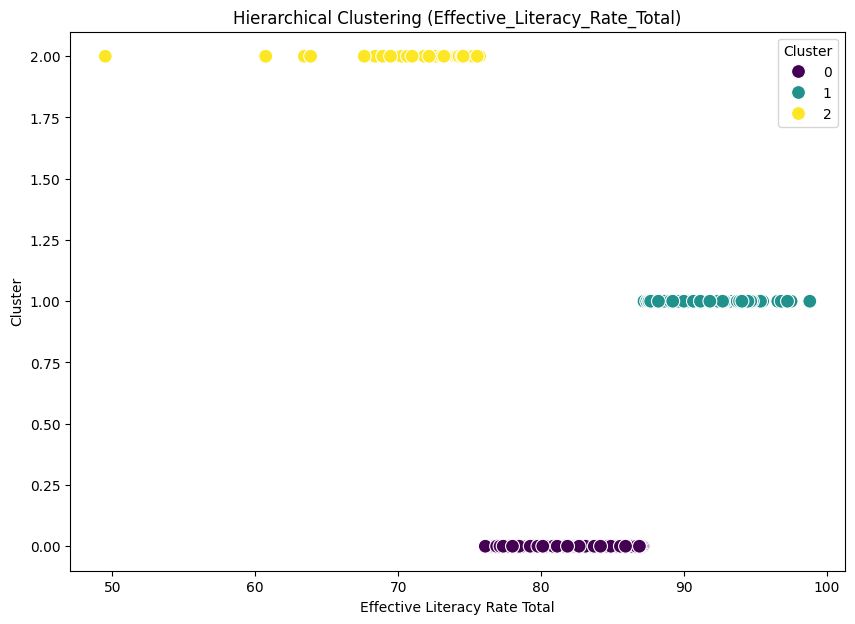

In [26]:
from sklearn.cluster import  AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster'] = agg_clust.fit_predict(x_scale)

plt.figure(figsize=(10,7))
sns.scatterplot(data = df,x='effective_literacy_rate_total',y=df['Cluster'],hue='Cluster',palette='viridis',s=100)
plt.title("Hierarchical Clustering (Effective_Literacy_Rate_Total)")
plt.xlabel("Effective Literacy Rate Total")
plt.ylabel("Cluster")
plt.show()

In [8]:
dff=pd.read_csv('/content/Hitters.csv')
dff

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [9]:
dff.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


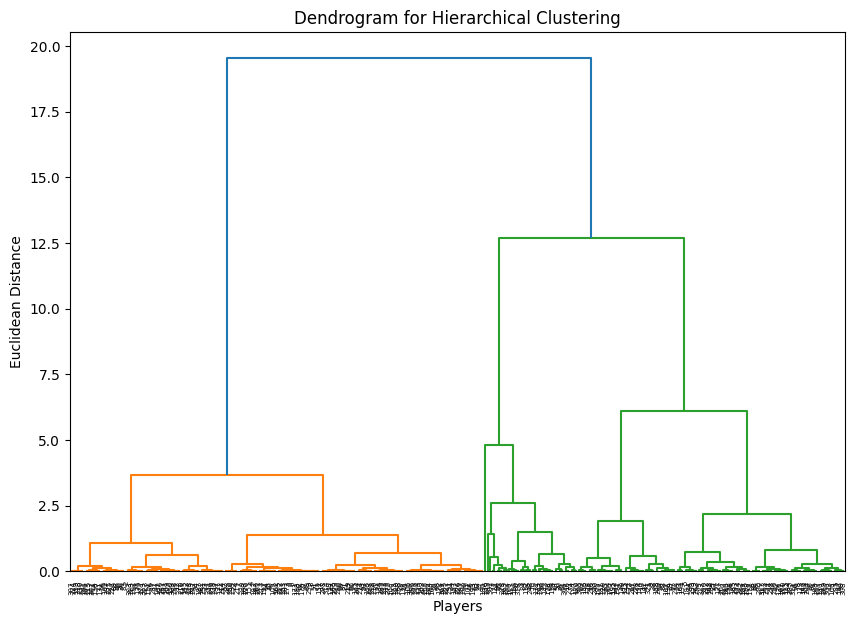

In [13]:
xx=dff[['CRuns']]
xx_scale=scale.fit_transform(xx)

z=linkage(xx_scale, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

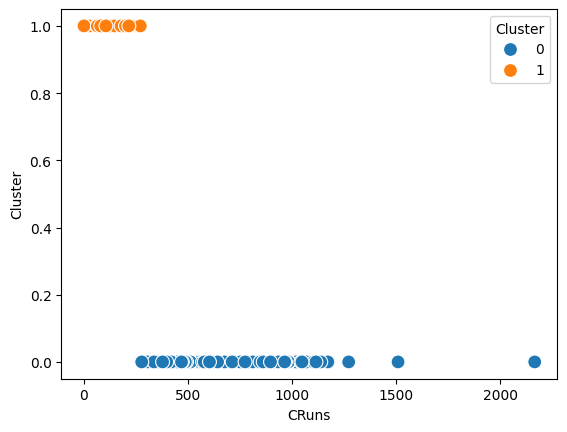

In [30]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster=AgglomerativeClustering(n_clusters=2,metric = "euclidean",linkage='ward')
dff['Cluster']=agg_cluster.fit_predict(xx_scale)

sns.scatterplot(data=dff,x=dff['CRuns'],y=dff['Cluster'],hue='Cluster',s=100)
plt.show()

In [14]:
dfff=pd.read_csv('/content/50_Startups.csv')
dfff

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
dfff.isnull().sum()

,0
RND,0
ADMIN,0
MKT,0
STATE,0
PROFIT,0


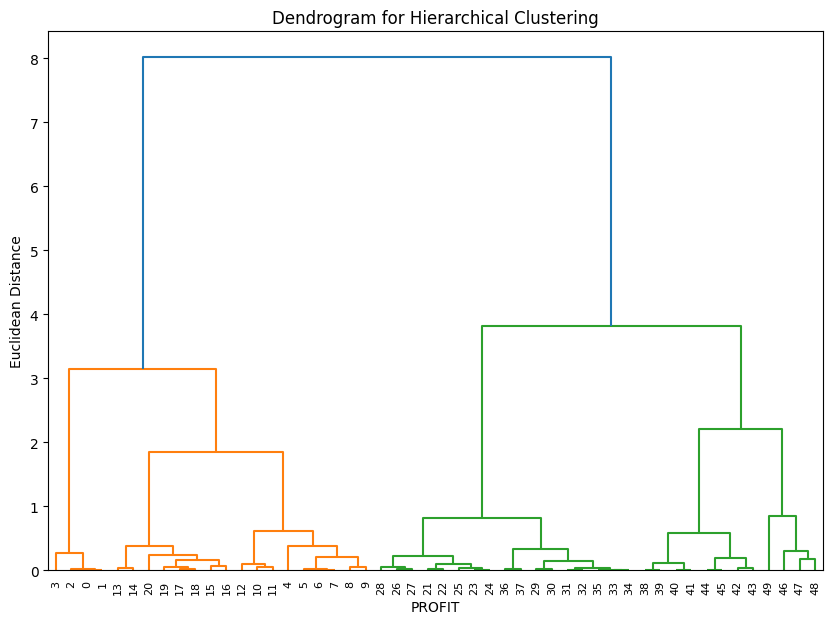

In [17]:
xxx=dfff[['PROFIT']]
xxx_scale=scale.fit_transform(xxx)

z=linkage(xxx_scale, method='ward', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("PROFIT")
plt.ylabel("Euclidean Distance")
plt.show()